In [473]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
from bioinfokit.analys import stat
dane = pd.read_excel("B:/pobrane/Geometria Napoiny.xlsx")

,Voltage [V],variable,value
0,19,Height [mm],1.58
1,19,Height [mm],1.56
2,19,Height [mm],1.68
3,19,Height [mm],1.75
4,21,Height [mm],1.82
5,21,Height [mm],1.67
6,21,Height [mm],1.48
7,21,Height [mm],1.37
8,24,Height [mm],1.49
9,24,Height [mm],1.61


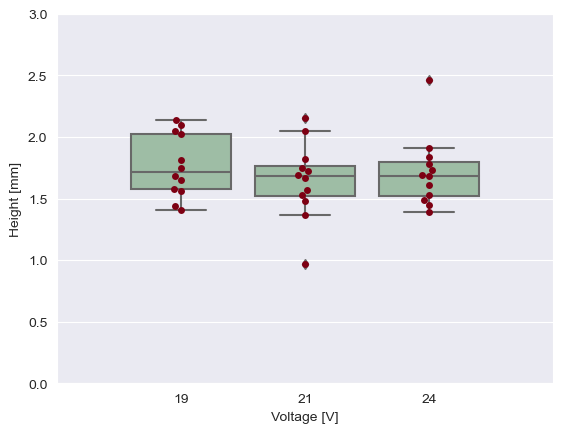

In [474]:
df_melt = pd.melt(dane.reset_index(),id_vars=["Voltage [V]"],value_vars=["Height [mm]"])
ax = sns.boxplot(x='Voltage [V]', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Voltage [V]", y="value", data=df_melt, color='#7d0013')
plt.ylim(0,3)
plt.xlim(-1,3)
plt.ylabel("Height [mm]")
plt.plot()
df_melt

In [475]:
df_melt.columns = ['Voltage','index', 'value']
res = stat()
res.anova_stat(df=df_melt,res_var="value",anova_model='value ~ C(Voltage)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Voltage),2.0,0.084372,0.042186,0.522854,0.597656
Residual,33.0,2.662583,0.080684,NaN,NaN


[]

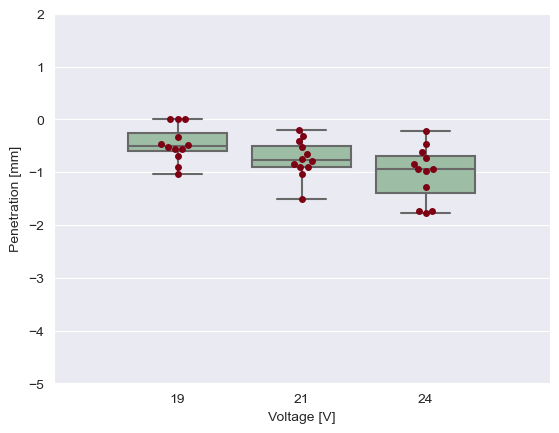

In [476]:
df_melt = pd.melt(dane.reset_index(),id_vars=["Voltage [V]"],value_vars=["Penetration [mm]"])
df_melt
ax = sns.boxplot(x='Voltage [V]', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Voltage [V]", y="value", data=df_melt, color='#7d0013')
plt.ylim(-5,2)
plt.xlim(-1,3)
plt.ylabel("Penetration [mm]")
plt.plot()

In [477]:
df_melt.columns = ['Voltage','index', 'value']
res = stat()
res.anova_stat(df=df_melt,res_var="value",anova_model='value ~ C(Voltage)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Voltage),2.0,1.874957,0.937479,5.624978,0.007905
Residual,33.0,5.499896,0.166664,NaN,NaN


[]

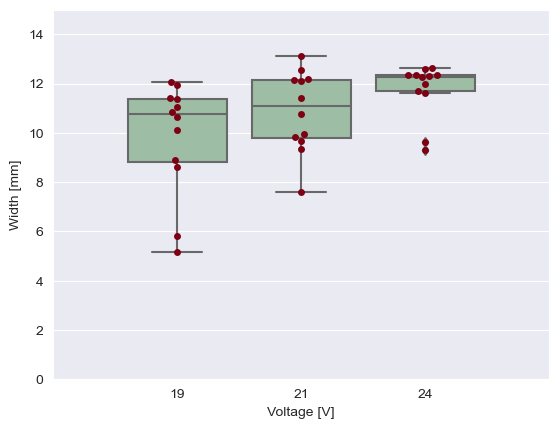

In [478]:
df_melt = pd.melt(dane.reset_index(),id_vars=["Voltage [V]"],value_vars=["Width [mm]"])
df_melt
ax = sns.boxplot(x='Voltage [V]', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Voltage [V]", y="value", data=df_melt, color='#7d0013')
plt.ylim(0,15)
plt.xlim(-1,3)
plt.ylabel("Width [mm]")
plt.plot()

In [479]:
df_melt.columns = ['Voltage','index', 'value']
res = stat()
res.anova_stat(df=df_melt,res_var="value",anova_model='value ~ C(Voltage)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Voltage),2.0,22.363106,11.181553,3.657404,0.036755
Residual,33.0,100.888850,3.057238,NaN,NaN


In [480]:
g1 = dane["Height [mm]"].tolist()
g2 = dane["Depth [mm]"].tolist()
g3 = dane["Width [mm]"].tolist()
g4 = dane["Penetration [mm]"].tolist()
t,p = st.levene(g1,g2,g3,g4)
if p < 0.05:
    print("Wariancje są zdecydowanie różne, zatem nie spełniają podstawowych założeń")
else:
    print("Wariancje nie są zdecydowanie różne, spełniają standardowe założenia")

Wariancje są zdecydowanie różne, zatem nie spełniają podstawowych założeń


In [481]:
# #chi kwadrat
# #st.chi2_contingency()
# #test mediany
# #st.median_test()
# # test levena
# #st.levene()
# #rang Kruskal
# #st.kruskal()
# # test nir
# model = LinearRegression()
# voltage_19 = dane[dane['Voltage [V]'] == 19]['Height [mm]']
# voltage_21 = dane[dane['Voltage [V]'] == 21]['Height [mm]']
# voltage_24 = dane[dane['Voltage [V]'] == 24]['Height [mm]']
# x = [19,21,24]
# y = []
# y.append(np.mean(voltage_19))
# y.append(np.mean(voltage_21))
# y.append(np.mean(voltage_24))
# model.fit(x, y)
# X_test = np.array([[2, 3, 4]])
# y_pred = model.predict(X_test)
# #tukey
# #st.pairwise_tukeyhsd()